In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [17]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [18]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [8]:
full_path='../data/processed/mean_impute_all_features.csv'
df = pd.read_csv(full_path)
df.reset_index(drop=True, inplace=True)
seed=10


In [26]:

# X, y= df.drop('gestational dm', axis=1), df['gestational dm'] 

# target = 'gestational dm'
# #Splitting X,y into Train & Test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed, stratify=y)

'gestational dm'

0    114
1     18
Name: gestational dm, dtype: int64


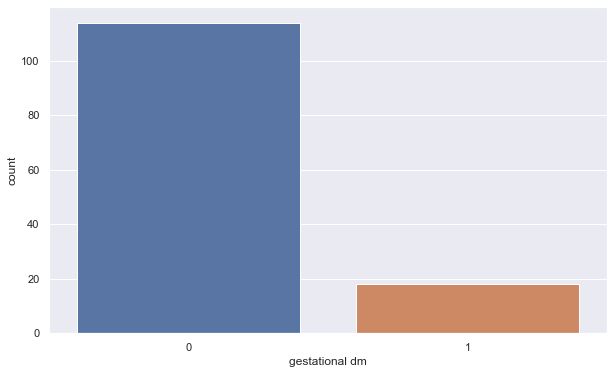

In [10]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

# class_weight='balanced'

<img src="./class_weight_inp_image.png">

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [44]:
unique_classes = list(df[target].unique())
unique_classes

[0, 1]

In [45]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df.shape[0]/((df.loc[df[target] == classes].shape[0])
                                     *len(unique_classes))

In [46]:
out_dict

{0: 0.5789473684210527, 1: 3.6666666666666665}

In [47]:
print (X_train.shape, y_train.shape)

(88, 9) (88,)


In [48]:
clf = RandomForestClassifier(class_weight='balanced',random_state=seed).fit(X_train, y_train)

In [49]:
from sklearn.utils import class_weight

In [91]:
class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

array([0.57894737, 3.66666667])

In [57]:
y_Test_Pred = clf.predict(X_test)
pd.crosstab(y_Test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])
generate_model_report(y_test, y_Test_Pred)

In [62]:
pd.crosstab(y_Test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])

In [59]:
generate_model_report(y_test, y_Test_Pred)

Accuracy =  0.8863636363636364
Precision =  0.6666666666666666
Recall =  0.3333333333333333
F1 Score =  0.4444444444444444


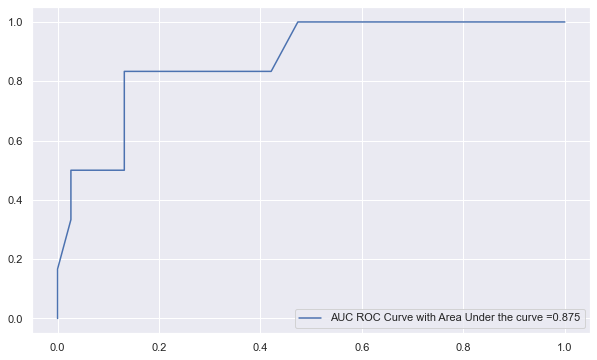

In [63]:
generate_auc_roc_curve(clf, X_test)

In [65]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.7131578947368421, 1: 0.2868421052631579}}


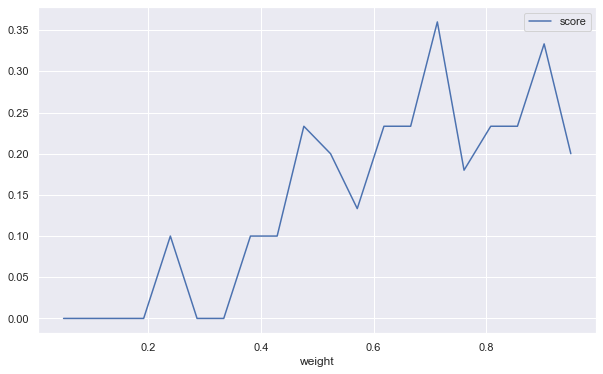

In [66]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data_out.plot(x='weight')

In [67]:
data_out

,score,weight
0,0.000000,0.050000
1,0.000000,0.097368
2,0.000000,0.144737
3,0.000000,0.192105
4,0.100000,0.239474
5,0.000000,0.286842
6,0.000000,0.334211
7,0.100000,0.381579
8,0.100000,0.428947
9,0.233333,0.476316


In [76]:
clf = RandomForestClassifier(**grid_result.best_params_).fit(X_train, y_train)

In [77]:
y_Test_Pred = clf.predict(X_test)

In [78]:
pd.crosstab(y_Test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,35,4
1,3,2


In [79]:
generate_model_report(y_test, y_Test_Pred)

Accuracy =  0.8409090909090909
Precision =  0.4
Recall =  0.3333333333333333
F1 Score =  0.3636363636363636


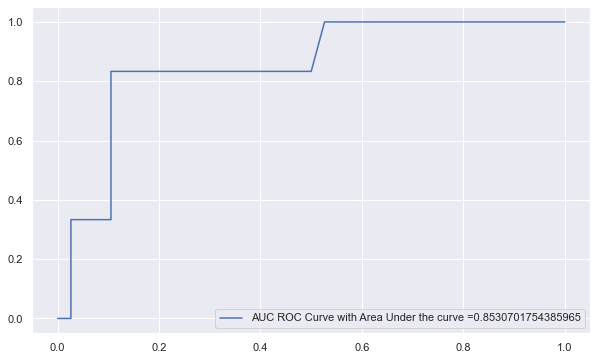

In [80]:
generate_auc_roc_curve(clf, X_test)

In [15]:
y_f = df['gestational dm']
X_f = df.drop(['gestational dm','ethnicity', 'central armellini fat (mm)', 'mean diastolic bp (mmhg)', 'mean systolic bp (mmhg)'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size=0.30, random_state=seed)
X_train.shape, y_train.shape

((92, 5), (92,))

In [20]:
rf_model=RandomForestClassifier(random_state=seed).fit(X_train, y_train)

In [24]:
y_Test_Pred = rf_model.predict(X_test)
pd.crosstab(y_Test_Pred, y_test, rownames=['Predicted'], colnames=['Actual'])
# generate_model_report(y_test, y_Test_Pred)

Actual,0,1
Predicted,,
0,33,6
1,1,0


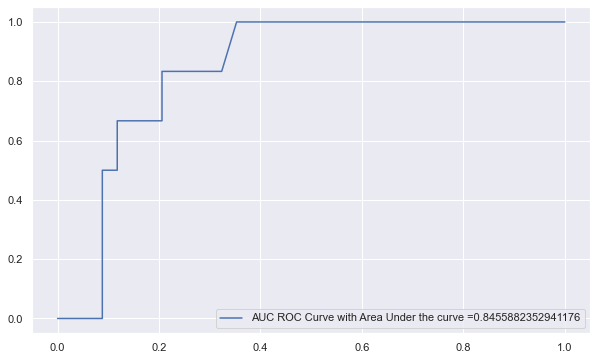

In [23]:
generate_auc_roc_curve(rf_model, X_test)